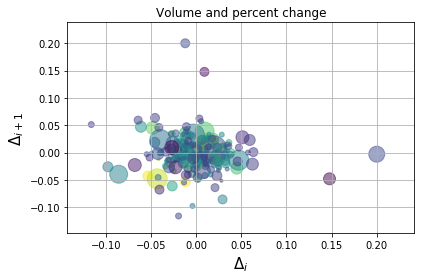

In [2]:
# %load scatter_demo2.py
"""
Demo of scatter plot with varying marker colors and sizes.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later
    price_data = np.load(datafile, encoding='bytes').view(np.recarray)
except TypeError:
    price_data = np.load(datafile).view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close)/price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()


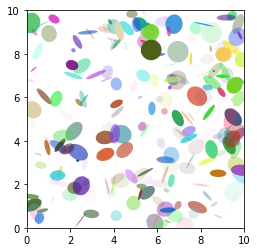

In [4]:
# %load ellipse_demo.py
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)
        for i in range(NUM)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rnd.rand())
    e.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


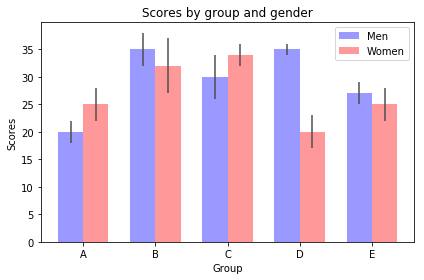

In [6]:
# %load barchart_demo.py
"""
Bar chart demo with pairs of bars grouped for easy comparison.
"""
import numpy as np
import matplotlib.pyplot as plt


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# %load date_demo.py
"""
================
Date tick labels
================

Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

"""
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later.
    r = np.load(datafile, encoding='bytes').view(np.recarray)
except TypeError:
    r = np.load(datafile).view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()


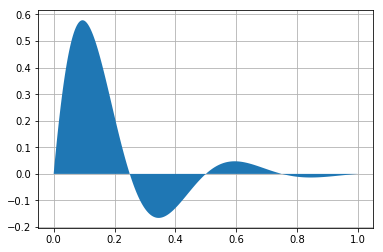

In [8]:
%run fill_demo.py

In [ ]:
# %load histogram_demo_features.py
"""
=========================================================
Demo of the histogram (hist) function with a few features
=========================================================

In addition to the basic histogram, this demo shows a few optional
features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the
      integral of the histogram is 1. The resulting histogram is an
      approximation of the probability density function.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


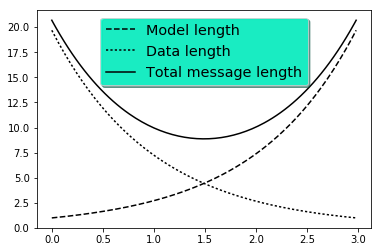

In [10]:
%load legend_demo.py

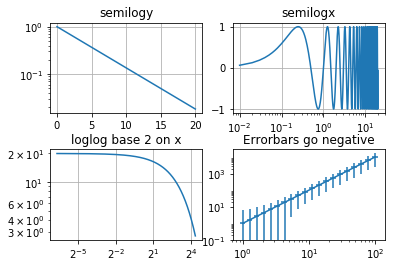

In [25]:
%run log_demo.py

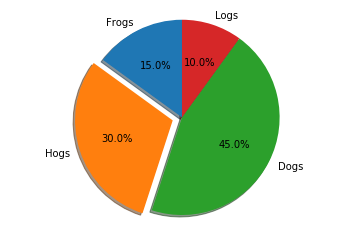

In [26]:
%run pie_demo_features.py

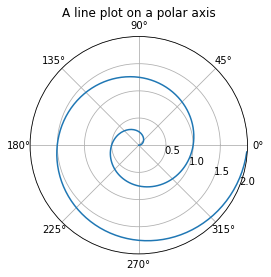

In [27]:
%run polar_demo.py

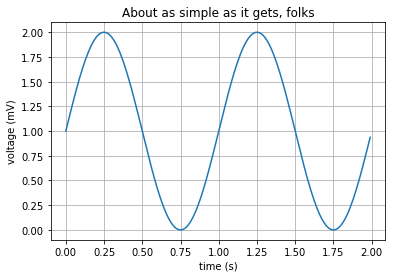

In [28]:
%run simple_plot.py

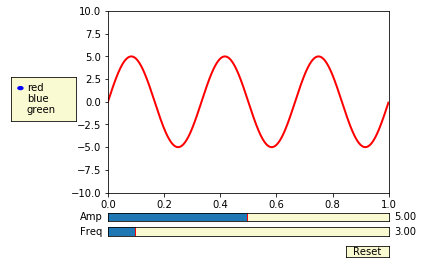

In [29]:
%run slider_demo.py

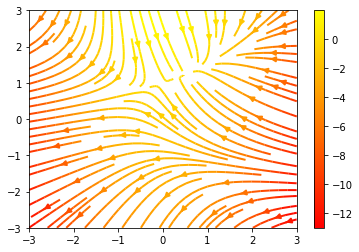

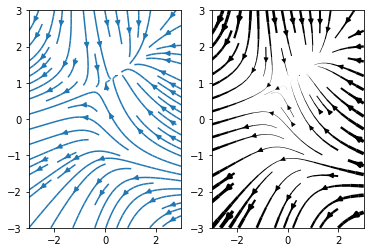

In [30]:
%run streamplot_demo_features.py

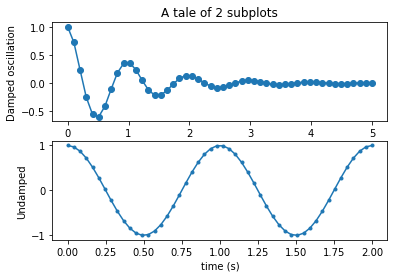

In [31]:
%run subplot_demo.py

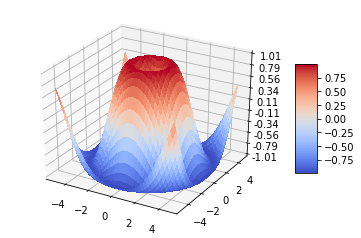

In [32]:
%run surface3d_demo.py

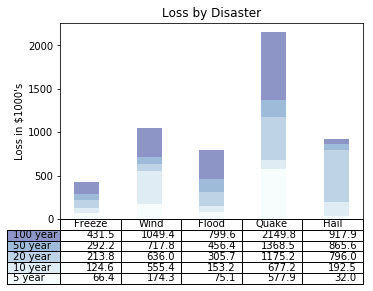

In [33]:
%run table_demo.py

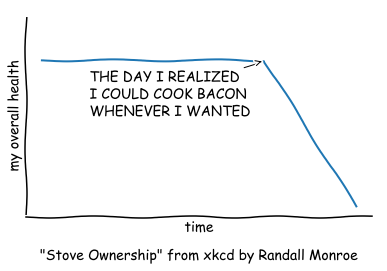

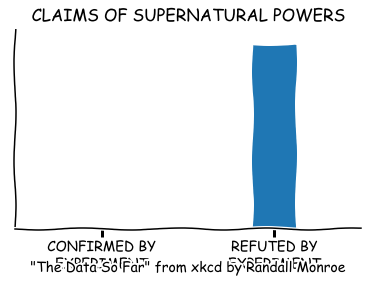

In [34]:
%run xkcd.py